------- Initiating ground truth -------
1 % data generated
2 % data generated
3 % data generated
4 % data generated
5 % data generated
6 % data generated
7 % data generated
8 % data generated
9 % data generated
10 % data generated
11 % data generated
12 % data generated
13 % data generated
14 % data generated
15 % data generated
16 % data generated
17 % data generated
18 % data generated
19 % data generated
20 % data generated
21 % data generated
22 % data generated
23 % data generated
24 % data generated
25 % data generated
26 % data generated
27 % data generated
28 % data generated
28 % data generated
30 % data generated
31 % data generated
32 % data generated
33 % data generated
34 % data generated
35 % data generated
36 % data generated
37 % data generated
38 % data generated
39 % data generated
40 % data generated
41 % data generated
42 % data generated
43 % data generated
44 % data generated
45 % data generated
46 % data generated
47 % data generated
48 % data generated
49 % data

<Figure size 575x250 with 0 Axes>

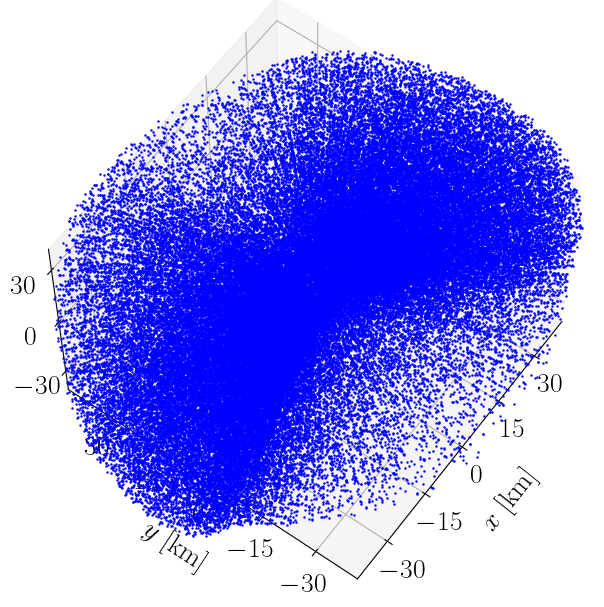

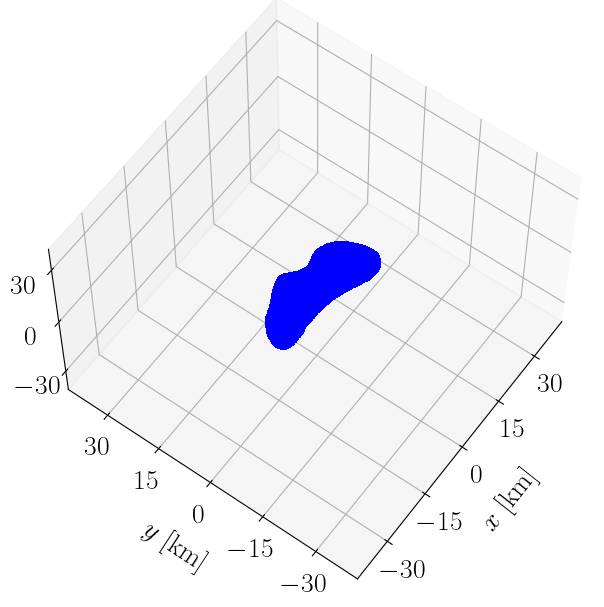

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pck
import os
import sys

# Add one level up to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from src.scenario import Scenario
from plots.plots_gravity import plot_dataset

# Import current directory
current_dir = os.getcwd()

# Conversion constants
deg2rad = np.pi/180
km2m = 1e3


# This sets groundtruth configuration
def configuration():
    # Set configuration file
    config = {
        'groundtruth': {'file': '',  # filled automatically
                        'asteroid_name': 'eros',  # 'eros'
                        'grav_model': 'poly',
                        #'file_poly': bsk_path + 'eros200700.tab',
                        'file_poly': current_dir + '/Polyhedron_files/eros/'
                                     + 'eros007790.tab',
                        'n_face': [],  # to be filled later
                        'data': 'dense',  # 'dense' / 'orbit'
                        'mascon': {'add': False,
                                   'mu_M': np.array([0.1, -0.1]) * 4.46275472004 * 1e5,
                                   'xyz_M': np.array([[10, 0, 0],
                                                      [-10, 0, 0]])*km2m},
                        'dense': {'dist': 'alt',  # 'alt', 'rad', 'ell'
                                  'rmax': 50 * km2m,
                                  'n_data': 100000},
                        'ejecta': {'dist': 'alt',  # 'alt', 'rad', 'ell'
                                   'rmax': 1e-3 * km2m,
                                   'n_data': 200000},
                        'gravmap': {'nr_3D': 40, 'nlat_3D': 40, 'nlon_3D': 40, 'rmax_3D': 160*km2m,
                                    'n_2D': 160, 'rmax_2D': 60*km2m}}
    }

    return config


if __name__ == "__main__":
    # Generate configuration
    config = configuration()
    config_gt = config['groundtruth']

    # Create scenario instance
    # and initialize groundtruth
    scen = Scenario(config)
    scen.init_groundtruth()
    gt = scen.groundtruth

    # Set asteroid gravity properties
    asteroid = gt.asteroid
    asteroid.add_poly(config_gt['file_poly'])
    if config_gt['mascon']['add']:
        asteroid.add_mascon(config_gt['mascon']['mu_M'],
                            config_gt['mascon']['xyz_M'])

    # Generate groundtruth data
    gt.generate_data()

    # Create gravity grids and maps
    gt.gravmap.create_grids(asteroid.shape)
    gt.gravmap.generate_maps(asteroid)

    # Delete asteroid swigpy objects
    asteroid.delete_swigpy()

    # Save simulation outputs
    with open(gt.file, "wb") as f:
        pck.dump(scen, f)

    # Plot dataset
    plot_dataset(gt.spacecraft.data.pos_BP_P,
                 asteroid.shape.xyz_vert,
                 asteroid.shape.order_face)
    plot_dataset(gt.ejecta.data.pos_BP_P,
                 asteroid.shape.xyz_vert,
                 asteroid.shape.order_face)
    plt.show()
